# Inferential statistics II - Bootstrapping

## Introduction

In the previous exercises you performed frequentist calculations to perform inference from a sample of data. Such inference relies on theory largely developed from the 19th Century onwards that is subject to certain assumptions or theoretical limits. These are fine if those assumptions hold in your case, and what you want to do has a known theoretical distribution, for example the mean of a sampling distribution that we looked at.

In these exercises we are once again going to load in the medical charge data but this time we are going to make inferences about the population using bootstrapping, that is simulating repeated re-runs of an experiment. If frequentism is about using assumptions and theoretical results to calculate what we expect to happen were an experiment to be run again and again and again, then bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what actually happens.

## Prerequisites

Whilst these exercises do not strictly depend on these concepts, before working through them, you should have completed the preceding assignment and have a good understanding of such frequentist concepts as
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

To complete these exercises, you should have covered the material on how to calculate bootstrap replicates of summary statistics. Having an appreciation of what confidence intervals and p-values are will be helpful.

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [2]:
med_charges = pd.read_csv('data/insurance2.csv')

In [3]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you would like to verify your calculations and check you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [5]:
# Draw a random sample with replacement from the original data, of the same size as the original data, ...
#...then apply a function to the new sample
# Source: https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=6
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [8]:
# Creates an empty array and fills the array with a test statistic for each replicate drawn by bootstrap_replicate_1d
def draw_bs_reps(data, func, size=1):
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

95% confidence interval = $ [12724.4679217]


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


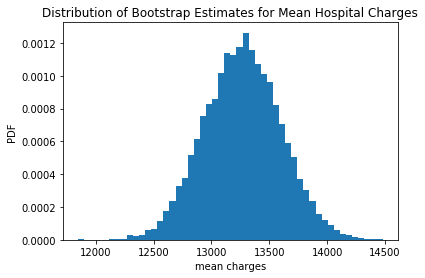

In [49]:
np.random.seed(47)
N_rep = 10000

# Draw bootstrap replicates of the mean charges
bs_replicates = draw_bs_reps(med_charges.charges,np.mean,size=N_rep)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[5.0])

# Print the confidence interval
print('95% confidence interval = $', conf_int)

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean charges')
_ = plt.ylabel('PDF')
_ = plt.title('Distribution of Bootstrap Estimates for Mean Hospital Charges')

# Show the plot
plt.show()


If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember in the previous exercise set, we saw there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__ Null Hypothesis: No statistically significant differences exist between the standard deviations of insurance and non-insurance claim charges.

Alternative Hypothesis: Statistically-significant differences exist between the standard deviations of insurance and non-insurance claim charges.

Result: Zero is the null value of the parameter. The null hypothesis is rejected because the 95% confidence interval of differences in the standard deviations of insurance and non-insurance claim charges does not span zero.

95% confidence interval = $ [6739.82384201 8430.48657846]


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


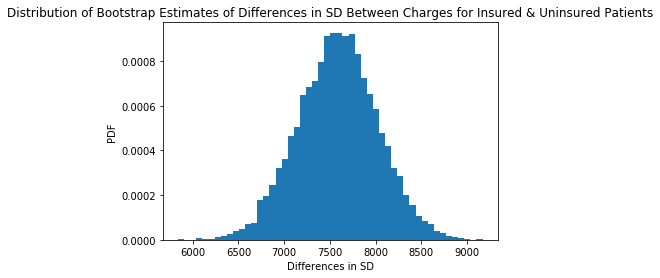

In [50]:
# set the bootstrap number of iterations
n = 10000
# filter the df into separate dfs - ins and un
ins = med_charges[med_charges.insuranceclaim ==1]
un = med_charges[med_charges.insuranceclaim ==0]

# make an empty array of differences between insured and uninsured sd's
bs_sd = np.empty(n)

# take the difference between the two sd'd random samples, repeat n times and store each difference value in the array
for i in range(n):
    # take one random sample with replacement from insured charges & takes the sd
    sd_ins = np.std(np.random.choice(ins.charges, size=len(ins)))
    # take one random sample with replacement of uninsured charges & take the sd
    sd_un = np.std(np.random.choice(un.charges, size=len(ins)))
    # store each difference value as a unique entry in the array
    bs_sd[i] = sd_ins - sd_un
# repeat the above n times and store each difference value in the array

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_sd,[2.5, 97.5])

# Print the confidence interval
print('95% confidence interval = $', conf_int)

# Plot the histogram of the replicates
_ = plt.hist(bs_sd, bins=50, normed=True)
_ = plt.xlabel('Differences in SD')
_ = plt.ylabel('PDF')
_ = plt.title('Distribution of Bootstrap Estimates of Differences in SD Between Charges for Insured & Uninsured Patients')

# Show the plot
plt.show()

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type II error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this but using the bootstrap.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__ Null Hypothesis: No statistically-significant differences exist between of insurance and non-insurance claim charges. They can be considered to derive from the same population of charges characterized by the same distributionns

of insurance and non-insurance claim charges

Alternative Hypothesis: Statistically-significant differences exist between insurance and non-insurance claim amounts, suggesting they come from different populations with unique distributions.

Results: The null hypothesis that insured and uninsured claims have the same distribution should be rejected based on the bootstrap p-value of zero.

In [213]:
# Create series for insured and uninsured charges

ins_c = ins.charges
un_c = un.charges

# Calculate the difference in mean charges between insured and uninsured claims
np.mean(ins_c) - np.mean(un_c)

7602.506384231368

In [214]:
# Source: https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/introduction-to-hypothesis-testing?ex=2

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Source: https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/introduction-to-hypothesis-testing?ex=7

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Source: https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/introduction-to-hypothesis-testing?ex=9

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean charges between insured and uninsured claims: empirical_diff_means
#empirical_diff_means = diff_of_means(ran1,ran2)
empirical_diff_means = diff_of_means(ins_c,un_c)
# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(ins_c, un_c,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0


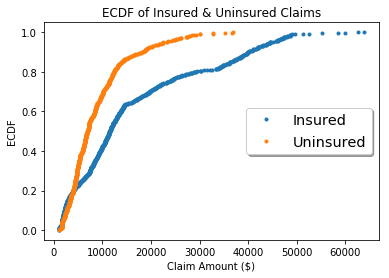

In [205]:
# define ECDF function
# Source: https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/graphical-exploratory-data-analysis?ex=12

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Source: https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/graphical-exploratory-data-analysis?ex=13
# Compute ECDFs for insured & uninsured claims

x_ins, y_ins = ecdf(ins_c)
x_un, y_un = ecdf(un_c)

# Generate plot
plt.plot(x_ins,y_ins,linestyle='none',marker='.',label='Insured')
plt.plot(x_un,y_un,linestyle='none',marker='.',label='Uninsured')

# Label the axes
plt.xlabel('Claim Amount ($)')
plt.ylabel('ECDF')

_ = plt.title('ECDF of Insured & Uninsured Claims')
_ = plt.legend(loc='center right', shadow=True, fontsize='x-large')

# Display the plot
plt.show()

Text(0.17,0.75,'<-Uninsured Mean')

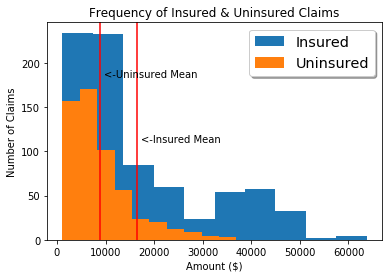

In [199]:
_ = plt.hist(ins_c, label ='Insured')
_ = plt.hist(un_c, label = 'Uninsured')
_ = plt.xlabel('Amount ($)')
_ = plt.ylabel('Number of Claims')
_ = plt.title('Frequency of Insured & Uninsured Claims')
_ = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
line = plt.axvline(np.mean(ins_c), color ='r')
plt.annotate('<-Insured Mean', xy=(0.28, 0.45), xycoords='axes fraction')
line = plt.axvline(np.mean(un_c), color ='r')
plt.annotate('<-Uninsured Mean', xy=(0.17, 0.75), xycoords='axes fraction')

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__ Below, I produced the histogram and a verical line showing the empirical difference between means. I am not sure about the second half of the question referring to multiple lines, however.

Text(0.42,0.5,'Empirical Difference Between \nInsured Mean & Uninsured Mean ->')

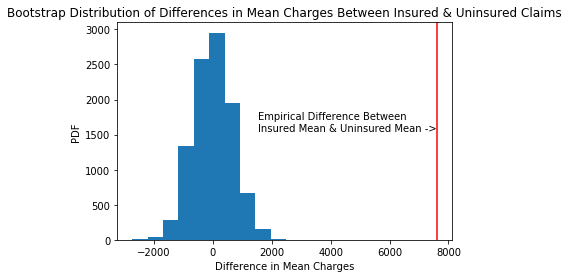

In [210]:
_ = plt.hist(perm_replicates)
_ = plt.axvline(empirical_diff_means, color ='r')
_ = plt.xlabel('Difference in Mean Charges')
_ = plt.ylabel('PDF')
_ = plt.title('Bootstrap Distribution of Differences in Mean Charges Between Insured & Uninsured Claims')
plt.annotate('Empirical Difference Between \nInsured Mean & Uninsured Mean ->', xy=(0.42, 0.50), xycoords='axes fraction')

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__ The p-value obtained from the t-test comparison of the differences between means was extremely small (4.461230231620717e-31), consistent with the bootstrap results. Obtaining a value this small using a bootstrap approach would require substantial computing resources, and might take some time for execution. I would not advise pursuing this goal using a standard desktop computer.

__Q:__ Remember the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__ We employed one t-test assuming equal variances between groups and another assuming unequal variances. We would emply the latter approach since earlier we discovered statistically-significant differences in the standard deviation of insured and uninsured claims.

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real world consequence of rejecting the null hypothesis?

__A:__ A one-sided hypothesis test would be more appropriate since presumably the team would want to know if the new algorithm elevated click-throughs. The null hypothesis would be that B did not generate an increased rate compared to A. The alternative hypothesis would be that B generated a significantly higher rate compared to A. Rejecting the null hypothesis would suggest that the team's algorithm represented an improvement.

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.